# --- Non-linear dataset (swiss roll) -----------------------------------------------------------

## Populate swiss-roll dataset

In [1]:
from sklearn import datasets

In [2]:
X, color = datasets.make_swiss_roll(n_samples=5000, noise=0.0)

In [3]:
Y_labels = ['X', 'Y', 'Z']

## Prepare data (feature scaling)

### <font color='red'>NOT required!</font>

Centering shouldn't matter since the algorithm only operates on distances between points, however rescaling is necessary if you want the different dimensions to be treated with equal importance, since the 2-norm will be more heavily influenced by dimensions with large variance.

In [4]:
#from sklearn import preprocessing

In [5]:
#std_scale = preprocessing.StandardScaler().fit(X)

In [6]:
#X_scaled = std_scale.transform(X)
X_scaled  = X

## Apply Isomap dimentionality reduction

In [7]:
from sklearn import manifold
isomap = manifold.Isomap(n_neighbors=10, n_components=2)

In [8]:
from time import time

In [9]:
t0 = time()
X_projected_isomap = isomap.fit_transform(X_scaled)
t1 = time()

In [10]:
print("Time:", t1-t0)

Time: 16.339558839797974


## Plot

In [11]:
import matplotlib.pyplot as plt

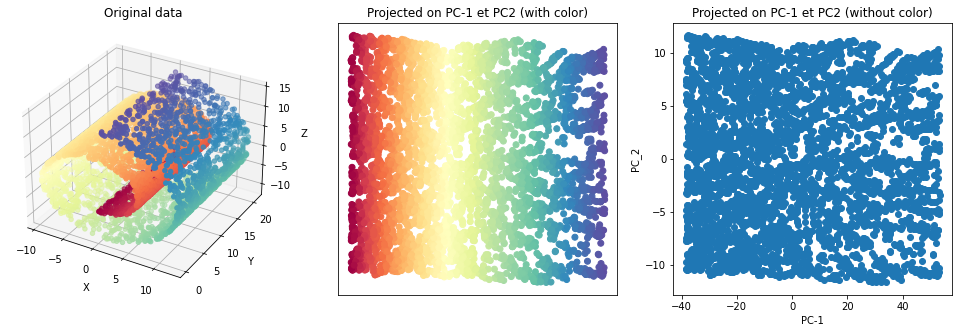

In [12]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected_isomap[:, 0], X_projected_isomap[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected on PC-1 et PC2 (with color)')

ax = fig.add_subplot(133)
ax.scatter(X_projected_isomap[:, 0], X_projected_isomap[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected on PC-1 et PC2 (without color)')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

# === PCA comparison ===========================================

## Prepare data (feature scaling)

In [13]:
from sklearn import preprocessing

In [14]:
std_scale = preprocessing.StandardScaler().fit(X)

In [15]:
X_scaled = std_scale.transform(X)

## Apply PCA dimentionality reduction

In [16]:
from sklearn import decomposition

In [17]:
pca = decomposition.PCA(n_components=2)

#### Decompose

In [18]:
pca.fit(X_scaled)

PCA(n_components=2)

#### Examine explained variance

...

#### Project

In [19]:
X_projected_pca = pca.transform(X_scaled)
X_projected_pca.shape

(5000, 2)

## Plot

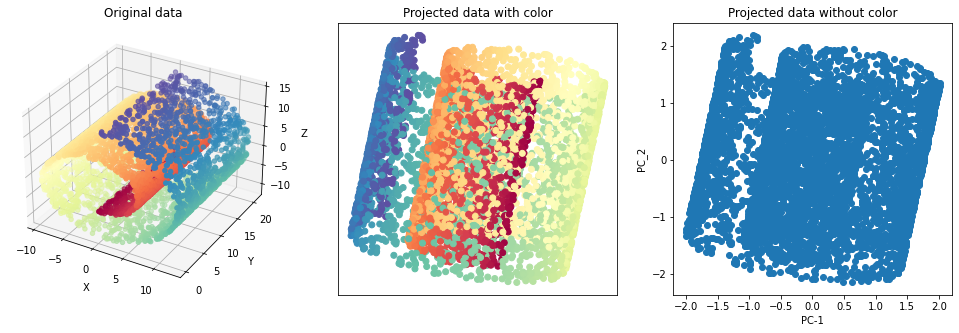

In [20]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected_pca[:, 0], X_projected_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected data with color')

ax = fig.add_subplot(133)
ax.scatter(X_projected_pca[:, 0], X_projected_pca[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected data without color')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

## --- Notes ----------------------------------------------------------------------------------------------------------------

PCA doesn't works well with non-linearly separable datasets... 

Isomap successfuly unroll the dataset and make it usable (linearly separable) in 2D, but it is very <font color='red'>very slow</font> (global structure)...

So we should <font color='red'>try to LLE or t-SNE instead</font>.